In [1]:
import pandas as pd
ratings = pd.read_csv('ratings.csv')
print ratings.head(10)
ratings.tail()

   userId  movieId  rating   timestamp
0       1        2     3.5  1112486027
1       1       29     3.5  1112484676
2       1       32     3.5  1112484819
3       1       47     3.5  1112484727
4       1       50     3.5  1112484580
5       1      112     3.5  1094785740
6       1      151     4.0  1094785734
7       1      223     4.0  1112485573
8       1      253     4.0  1112484940
9       1      260     4.0  1112484826


,userId,movieId,rating,timestamp
20000258,138493,68954,4.5,1258126920
20000259,138493,69526,4.5,1259865108
20000260,138493,69644,3.0,1260209457
20000261,138493,70286,5.0,1258126944
20000262,138493,71619,2.5,1255811136


In [2]:
ratings[ratings.movieId==1].head()

,userId,movieId,rating,timestamp
236,3,1,4.0,944919407
517,6,1,5.0,858275452
817,8,1,4.0,833981871
922,10,1,4.0,943497887
960,11,1,4.5,1230858821


In [3]:
#get number of ratings by movie
#obj = ratings.groupby('movieId').agg('count') #gets you the same as tye next two lines
obj = ratings.groupby('movieId')
obj1 = obj.agg({'rating':'count'})
obj1.head(20)

,rating
movieId,
1,49695
2,22243
3,12735
4,2756
5,12161
6,23899
7,12961
8,1415
9,3960


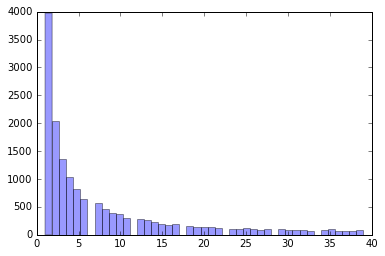

In [4]:
# distribution of number of ratings
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
rat = obj1.rating
rat1 =rat[rat<40]

d= plt.hist(rat1, alpha=0.4, bins=45)

In [5]:
# eliminate movies with less than 5 ratings
r1 = obj1[obj1['rating'] >4]
r1=r1.reset_index() #makes movieId a column
print r1.head(), r1.shape

   movieId  rating
0        1   49695
1        2   22243
2        3   12735
3        4    2756
4        5   12161 (18345, 2)


In [6]:
type(r1)

pandas.core.frame.DataFrame

In [7]:
ratshort = pd.merge( ratings,r1, how='inner', on='movieId')
ratshort.head(20)
#print ratings.shape, obj1.shape

,userId,movieId,rating_x,timestamp,rating_y
0,1,2,3.5,1112486027,22243
1,5,2,3.0,851527569,22243
2,13,2,3.0,849082742,22243
3,29,2,3.0,835562174,22243
4,34,2,3.0,846509384,22243
5,54,2,3.0,974918176,22243
6,88,2,1.0,1098277938,22243
7,91,2,3.5,1112061358,22243
8,116,2,2.0,1132728068,22243
9,119,2,4.0,845110667,22243


In [8]:
#ratings.groupby('userId').agg('count')
#ratings.head(3)
ratshort.groupby('userId').agg('mean').head(20)

,movieId,rating_x,timestamp,rating_y
userId,,,,
1,3428.537143,3.742857,1.107833e+09,14371.822857
2,2098.524590,4.000000,9.748208e+08,13854.524590
3,1698.331551,4.122995,9.450063e+08,15386.775401
4,394.964286,3.571429,8.408791e+08,25544.928571
5,574.484848,4.272727,8.515452e+08,27072.136364
6,461.875000,3.750000,8.582756e+08,20684.250000
7,2425.079710,3.289855,1.011207e+09,11282.282609
8,339.385714,3.800000,8.340797e+08,28554.085714
9,3185.742857,3.057143,9.940200e+08,11753.857143


In [9]:
# eliminate users with less than 20 ratings
check = ratshort.groupby('userId').agg('count') 
s=check.sort_values(by='movieId', ascending=True, axis=0) #after eliminating movies fewer than 5 ratings, 17 users out
# of a total of 138493 have fewer than 20 ratings : 29 have 19 ratings, 7 have 18, 5 has 17, 2 has 16. I decide to leave them in 
# since they form a very small proportion and eliminating them mightcause some of the movies to have fewer than 5 
# ratings. minimum 5 ratings: 15 have 19, one 17, one 16
s.head(20)
#s[s.movieId ==18].shape

,movieId,rating_x,timestamp,rating_y
userId,,,,
47700,16,16,16,16
136626,17,17,17,17
68435,19,19,19,19
75471,19,19,19,19
56882,19,19,19,19
60406,19,19,19,19
89621,19,19,19,19
61524,19,19,19,19
32688,19,19,19,19


In [10]:
s.movieId.median()

68.0

In [11]:
ratshort.shape #(19984024, 3) 
ratshort = ratshort.drop(['timestamp', 'rating_y'], axis=1)
ratshort.head(20)

,userId,movieId,rating_x
0,1,2,3.5
1,5,2,3.0
2,13,2,3.0
3,29,2,3.0
4,34,2,3.0
5,54,2,3.0
6,88,2,1.0
7,91,2,3.5
8,116,2,2.0
9,119,2,4.0


In [12]:
#ratshort.to_csv('rats.csv')

In [13]:
import numpy as np
movies = pd.read_csv('movies.csv')
print movies.shape
print movies.head()
print movies.tail()

(27278, 3)
   movieId                               title  \
0        1                    Toy Story (1995)   
1        2                      Jumanji (1995)   
2        3             Grumpier Old Men (1995)   
3        4            Waiting to Exhale (1995)   
4        5  Father of the Bride Part II (1995)   

                                        genres  
0  Adventure|Animation|Children|Comedy|Fantasy  
1                   Adventure|Children|Fantasy  
2                               Comedy|Romance  
3                         Comedy|Drama|Romance  
4                                       Comedy  
       movieId                          title                    genres
27273   131254   Kein Bund für's Leben (2007)                    Comedy
27274   131256  Feuer, Eis & Dosenbier (2002)                    Comedy
27275   131258             The Pirates (2014)                 Adventure
27276   131260            Rentun Ruusu (2001)        (no genres listed)
27277   131262               Innoc

In [14]:
movs = movies.drop(['genres'], axis=1)
movs.head()

,movieId,title
0,1,Toy Story (1995)
1,2,Jumanji (1995)
2,3,Grumpier Old Men (1995)
3,4,Waiting to Exhale (1995)
4,5,Father of the Bride Part II (1995)


In [15]:
movs_short = pd.merge( movs,r1, how='inner', on='movieId')
movs_short = movs_short.drop(['rating'], axis=1)
movs_short.head()

,movieId,title
0,1,Toy Story (1995)
1,2,Jumanji (1995)
2,3,Grumpier Old Men (1995)
3,4,Waiting to Exhale (1995)
4,5,Father of the Bride Part II (1995)


In [16]:
l = movies['genres'].str.split('|')
allgenres = set(sum(l, []))
allgenres

{'(no genres listed)',
 'Action',
 'Adventure',
 'Animation',
 'Children',
 'Comedy',
 'Crime',
 'Documentary',
 'Drama',
 'Fantasy',
 'Film-Noir',
 'Horror',
 'IMAX',
 'Musical',
 'Mystery',
 'Romance',
 'Sci-Fi',
 'Thriller',
 'War',
 'Western'}

In [17]:
def WhichGenre(movie, genre):
    return genre in movie
WhichGenre(l[0], 'Action')

False

In [18]:
l = movies['genres'].str.split('|')
l=pd.DataFrame(l)
l.shape
df = pd.DataFrame(np.zeros([27278, 20], dtype=int), columns=['(no genres listed)','Action','Adventure','Animation','Children','Comedy',
'Crime','Documentary','Drama','Fantasy','Film-Noir','Horror','IMAX','Musical','Mystery','Romance','Sci-Fi','Thriller',
'War','Western'])
df.shape
l= pd.concat([l, df], axis=1)
l.head(20)

,genres,(no genres listed),Action,Adventure,Animation,Children,Comedy,Crime,Documentary,Drama,...,Film-Noir,Horror,IMAX,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western
0,"[Adventure, Animation, Children, Comedy, Fantasy]",0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,"[Adventure, Children, Fantasy]",0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,"[Comedy, Romance]",0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,"[Comedy, Drama, Romance]",0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,[Comedy],0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,"[Action, Crime, Thriller]",0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6,"[Comedy, Romance]",0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7,"[Adventure, Children]",0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
8,[Action],0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9,"[Action, Adventure, Thriller]",0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [19]:
for i in allgenres:
  l[i]=l['genres'].apply(lambda x: WhichGenre(x, i))
l.head()

,genres,(no genres listed),Action,Adventure,Animation,Children,Comedy,Crime,Documentary,Drama,...,Film-Noir,Horror,IMAX,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western
0,"[Adventure, Animation, Children, Comedy, Fantasy]",False,False,True,True,True,True,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,"[Adventure, Children, Fantasy]",False,False,True,False,True,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,"[Comedy, Romance]",False,False,False,False,False,True,False,False,False,...,False,False,False,False,False,True,False,False,False,False
3,"[Comedy, Drama, Romance]",False,False,False,False,False,True,False,False,True,...,False,False,False,False,False,True,False,False,False,False
4,[Comedy],False,False,False,False,False,True,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [20]:
# transform columns to 1 and 0 
l[['(no genres listed)','Action','Adventure','Animation','Children','Comedy','Crime','Documentary','Drama','Fantasy',
  'Film-Noir','Horror','IMAX','Musical','Mystery','Romance','Sci-Fi','Thriller','War','Western']] = l[['(no genres listed)','Action','Adventure','Animation','Children','Comedy','Crime','Documentary','Drama','Fantasy',
  'Film-Noir','Horror','IMAX','Musical','Mystery','Romance','Sci-Fi','Thriller','War','Western']].astype(int)
l.head() 

,genres,(no genres listed),Action,Adventure,Animation,Children,Comedy,Crime,Documentary,Drama,...,Film-Noir,Horror,IMAX,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western
0,"[Adventure, Animation, Children, Comedy, Fantasy]",0,0,1,1,1,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,"[Adventure, Children, Fantasy]",0,0,1,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,"[Comedy, Romance]",0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,1,0,0,0,0
3,"[Comedy, Drama, Romance]",0,0,0,0,0,1,0,0,1,...,0,0,0,0,0,1,0,0,0,0
4,[Comedy],0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [21]:
# Merge the movies data frame and l
movies1 = pd.concat([movies, l], axis=1)
movies1 = pd.DataFrame(movies1 )
movies1.head(20)
#type(movies1) pandas.core.frame.DataFrame

,movieId,title,genres,genres,(no genres listed),Action,Adventure,Animation,Children,Comedy,...,Film-Noir,Horror,IMAX,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,"[Adventure, Animation, Children, Comedy, Fantasy]",0,0,1,1,1,1,...,0,0,0,0,0,0,0,0,0,0
1,2,Jumanji (1995),Adventure|Children|Fantasy,"[Adventure, Children, Fantasy]",0,0,1,0,1,0,...,0,0,0,0,0,0,0,0,0,0
2,3,Grumpier Old Men (1995),Comedy|Romance,"[Comedy, Romance]",0,0,0,0,0,1,...,0,0,0,0,0,1,0,0,0,0
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance,"[Comedy, Drama, Romance]",0,0,0,0,0,1,...,0,0,0,0,0,1,0,0,0,0
4,5,Father of the Bride Part II (1995),Comedy,[Comedy],0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
5,6,Heat (1995),Action|Crime|Thriller,"[Action, Crime, Thriller]",0,1,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
6,7,Sabrina (1995),Comedy|Romance,"[Comedy, Romance]",0,0,0,0,0,1,...,0,0,0,0,0,1,0,0,0,0
7,8,Tom and Huck (1995),Adventure|Children,"[Adventure, Children]",0,0,1,0,1,0,...,0,0,0,0,0,0,0,0,0,0
8,9,Sudden Death (1995),Action,[Action],0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9,10,GoldenEye (1995),Action|Adventure|Thriller,"[Action, Adventure, Thriller]",0,1,1,0,0,0,...,0,0,0,0,0,0,0,1,0,0


In [22]:
print movies1[:0]

Empty DataFrame
Columns: [movieId, title, genres, genres, (no genres listed), Action, Adventure, Animation, Children, Comedy, Crime, Documentary, Drama, Fantasy, Film-Noir, Horror, IMAX, Musical, Mystery, Romance, Sci-Fi, Thriller, War, Western]
Index: []

[0 rows x 24 columns]


In [23]:
print movies1.head().to_csv(sep='\t', index=False, header=False)

1	Toy Story (1995)	Adventure|Animation|Children|Comedy|Fantasy	['Adventure', 'Animation', 'Children', 'Comedy', 'Fantasy']	0	0	1	1	1	1	0	0	0	1	0	0	0	0	0	0	0	0	0	0
2	Jumanji (1995)	Adventure|Children|Fantasy	['Adventure', 'Children', 'Fantasy']	0	0	1	0	1	0	0	0	0	1	0	0	0	0	0	0	0	0	0	0
3	Grumpier Old Men (1995)	Comedy|Romance	['Comedy', 'Romance']	0	0	0	0	0	1	0	0	0	0	0	0	0	0	0	1	0	0	0	0
4	Waiting to Exhale (1995)	Comedy|Drama|Romance	['Comedy', 'Drama', 'Romance']	0	0	0	0	0	1	0	0	1	0	0	0	0	0	0	1	0	0	0	0
5	Father of the Bride Part II (1995)	Comedy	['Comedy']	0	0	0	0	0	1	0	0	0	0	0	0	0	0	0	0	0	0	0	0



In [24]:
tags = pd.read_csv('tags.csv')
print tags.head(10)
tags.tail()

   userId  movieId               tag   timestamp
0      18     4141       Mark Waters  1240597180
1      65      208         dark hero  1368150078
2      65      353         dark hero  1368150079
3      65      521     noir thriller  1368149983
4      65      592         dark hero  1368150078
5      65      668         bollywood  1368149876
6      65      898  screwball comedy  1368150160
7      65     1248     noir thriller  1368149983
8      65     1391              mars  1368150055
9      65     1617          neo-noir  1368150217


,userId,movieId,tag,timestamp
465559,138446,55999,dragged,1358983772
465560,138446,55999,Jason Bateman,1358983778
465561,138446,55999,quirky,1358983778
465562,138446,55999,sad,1358983772
465563,138472,923,rise to power,1194037967


In [25]:
gtags = pd.read_csv('genome-tags.csv')
print gtags.head(10)
gtags.tail()

   tagId           tag
0      1           007
1      2  007 (series)
2      3  18th century
3      4         1920s
4      5         1930s
5      6         1950s
6      7         1960s
7      8         1970s
8      9         1980s
9     10  19th century


,tagId,tag
1123,1124,writing
1124,1125,wuxia
1125,1126,wwii
1126,1127,zombie
1127,1128,zombies


In [26]:
gscores = pd.read_csv('genome-scores.csv')
print gscores.head()
gscores.tail()

   movieId  tagId  relevance
0        1      1    0.02500
1        1      2    0.02500
2        1      3    0.05775
3        1      4    0.09675
4        1      5    0.14675


,movieId,tagId,relevance
11709763,131170,1124,0.58775
11709764,131170,1125,0.01075
11709765,131170,1126,0.01575
11709766,131170,1127,0.11450
11709767,131170,1128,0.02175


In [27]:
#concatenate gtags and gscores
A = pd.merge(gtags, gscores, on='tagId', how='outer')

In [28]:
mr = pd.merge(movies1, ratings, on='movieId', how='outer')
mr.shape
mr.head()
#mr.to_csv('mr.csv')

,movieId,title,genres,genres,(no genres listed),Action,Adventure,Animation,Children,Comedy,...,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western,userId,rating,timestamp
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,"[Adventure, Animation, Children, Comedy, Fantasy]",0,0,1,1,1,1,...,0,0,0,0,0,0,0,3.0,4.0,9.449194e+08
1,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,"[Adventure, Animation, Children, Comedy, Fantasy]",0,0,1,1,1,1,...,0,0,0,0,0,0,0,6.0,5.0,8.582755e+08
2,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,"[Adventure, Animation, Children, Comedy, Fantasy]",0,0,1,1,1,1,...,0,0,0,0,0,0,0,8.0,4.0,8.339819e+08
3,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,"[Adventure, Animation, Children, Comedy, Fantasy]",0,0,1,1,1,1,...,0,0,0,0,0,0,0,10.0,4.0,9.434979e+08
4,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,"[Adventure, Animation, Children, Comedy, Fantasy]",0,0,1,1,1,1,...,0,0,0,0,0,0,0,11.0,4.5,1.230859e+09


In [29]:
!head mr.csv

,movieId,title,genres,genres,(no genres listed),Action,Adventure,Animation,Children,Comedy,Crime,Documentary,Drama,Fantasy,Film-Noir,Horror,IMAX,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western,userId,rating,timestamp
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,"['Adventure', 'Animation', 'Children', 'Comedy', 'Fantasy']",0,0,1,1,1,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,3.0,4.0,944919407.0
1,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,"['Adventure', 'Animation', 'Children', 'Comedy', 'Fantasy']",0,0,1,1,1,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,6.0,5.0,858275452.0
2,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,"['Adventure', 'Animation', 'Children', 'Comedy', 'Fantasy']",0,0,1,1,1,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,8.0,4.0,833981871.0
3,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,"['Adventure', 'Animation', 'Children', 'Comedy', 'Fantasy']",0,0,1,1,1,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,10.0,4.0,943497887.0
4,1,Toy Story (1995),Adventure

In [30]:
print movies1.head(), ratings.head(), tags.head(), A.head()

   movieId                               title  \
0        1                    Toy Story (1995)   
1        2                      Jumanji (1995)   
2        3             Grumpier Old Men (1995)   
3        4            Waiting to Exhale (1995)   
4        5  Father of the Bride Part II (1995)   

                                        genres  \
0  Adventure|Animation|Children|Comedy|Fantasy   
1                   Adventure|Children|Fantasy   
2                               Comedy|Romance   
3                         Comedy|Drama|Romance   
4                                       Comedy   

                                              genres  (no genres listed)  \
0  [Adventure, Animation, Children, Comedy, Fantasy]                   0   
1                     [Adventure, Children, Fantasy]                   0   
2                                  [Comedy, Romance]                   0   
3                           [Comedy, Drama, Romance]                   0   
4                 

In [31]:
links = pd.read_csv('links.csv')
links[['tmdbId']]= links['tmdbId'].apply(lambda x: int(x) if not pd.isnull(x) else -9999)
print links.head()
links.tail()

   movieId  imdbId  tmdbId
0        1  114709     862
1        2  113497    8844
2        3  113228   15602
3        4  114885   31357
4        5  113041   11862


,movieId,imdbId,tmdbId
27273,131254,466713,4436
27274,131256,277703,9274
27275,131258,3485166,285213
27276,131260,249110,32099
27277,131262,1724965,286971
